Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Iteration 11, loss = 0.04188246
Iteration 12, loss = 0.03864420
Iteration 13, loss = 0.03513415
Iteration 14, loss = 0.03222310
Iteration 15, loss = 0.02956183
Iteration 16, loss = 0.02620840
Iteration 17, loss = 0.02424569
Iteration 18, loss = 0.02129204
Iteration 19, loss = 0.02030622
Iteration 20, loss = 0.01848272
Iteration 21, loss = 0.01671861
Iteration 22, loss = 0.01520329
Iteration 23, loss = 0.01411466
Iteration 24, loss = 0.01292346
Iteration 25, loss = 0.01138195
Iteration 26, loss = 0.00996422
Iteration 27, loss = 0.00846271
Iteration 28, loss = 0.00736762
Iteration 29, loss = 0.00692193
Iteration 30, loss = 0.00544863
Iteration 31, loss = 0.00542354
Iteration 32, los

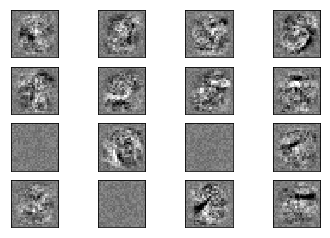

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import numpy as np

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

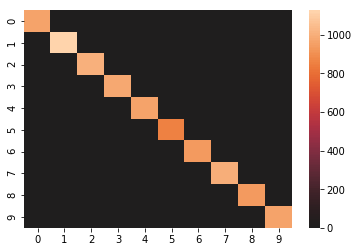

In [20]:
sns.heatmap(cm, center=True)
plt.show()

[[  5.38297670e-17   2.47862725e-09   3.26186635e-13   1.25338011e-07
    1.39103468e-21   1.56882154e-15   2.48661270e-24   9.99999240e-01
    6.32117755e-07   6.05202324e-13]]


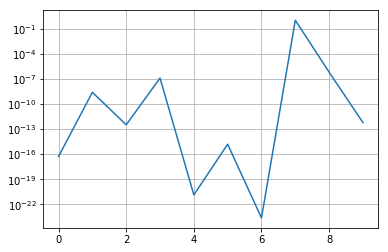

In [48]:
x = np.arange(0,10,1)
N=7300
print(mlp.predict_proba(X_test[N].reshape(1,-1)))
plt.semilogy(x, np.ravel(mlp.predict_proba(X_test[N].reshape(1,-1))))
plt.grid(True)
plt.show()